# Chapter 14 Notes








# Chapter 14 Exercises

### Exercise 14.1


$\mathbb{E}(a^TX) = \mathbb{E}(\sum_i^k a_iX_i) = \sum_i^k a_i\mathbb{E}(X_i) = a^T \mu$ <br> 
 
$\mathbb{V}(a^TX) = \mathbb{V}(\sum_i^k a_iX_i) = \sum_i^k a_i^2\mathbb{V}(X_i) + \sum_\limits{\substack{i, j\in[1,n]\\ i\neq j}} 2 a_ia_j\text{cov}(X_i,X_j) = a^T\sum a$ <br> 
 
given $A = [a_1, \dots, a_k]^T$, where $a_j$ are row vectors of size $k$: <br> 

$\mathbb{E}(AX) = \mathbb{E}([a_1, \dots, a_k]^TX) = \mathbb{E}([a_1 X, \dots, a_kX]^T) = [\mathbb{E}(a_1 X), \dots, \mathbb{E}(a_k X)]^T = [a_1 \mu, \dots, a_k\mu]^T = [a_1, \dots, a_k]^T\mu = A\mu$ <br>


$\mathbb{V}(AX) = \mathbb{E}((AX-\mathbb{E}(AX))(AX-\mathbb{E}(AX))^T ) = \mathbb{E}(A(X-\mathbb{E}(X))(X-\mathbb{E}(X))^TA^T) = A\mathbb{E}((X-\mathbb{E}(X))(X-\mathbb{E}(X))^T)A^T = A\sum A^T$

### Exercise 14.2

$\theta = [\theta_1,\dots\theta_k]$ <br> 
$f(x_i;\theta) = \dfrac{n!}{x_1!x_2!\dots x_k!}\theta_1^{x_1}\theta_2^{x_2}\dots \theta_k^{x_k}$

$l_s(\theta) = \sum^n_i \log(f(x_i;\theta)) = 
\sum^n_i \log(\dfrac{N!}{x_{i,1}!x_{i,2}!\dots x_{i,k}!}\theta_1^{x_{i,1}}\theta_2^{x_{i,2}}\dots \theta_k^{x_{i,k}}) = 
\sum^n_i \big( \log N! - \sum_j^k\log(x_{i,j}!) + \sum_j^k x_{i,j}\log(\theta_j!)\big)$ <br> 

$H_{k,l} = \dfrac{\partial^2 l_s(\theta)}{\partial\theta_k\partial\theta_l} = 
\dfrac{\partial^2}{\partial\theta_k\partial\theta_l}\big( \sum_i^n\sum_j^k x_{i,j}\log(\theta_j) \big) = 0$ given $i\neq j$ <br>
Thus, $\mathbb{E}_\theta(H_{k,l}) = 0$ given $i\neq j$ <br> 


$H_{k,k} = \dfrac{\partial^2 l_s(\theta)}{\partial^2\theta_k} = 
\dfrac{\partial^2}{\partial^2\theta_k}\big( \sum_i^n\sum_j^k x_{i,j}\log(\theta_j) \big) =
\dfrac{\partial^2}{\partial^2\theta_k}\big( \sum_i^n x_{i,k}\log(\theta_k) \big) =
-\theta_k^{-2}\sum_i^n x_{i,k}$ <br> 
Thus, $\mathbb{E}_{\theta}(H_{k,k}) = \mathbb{E}_{\theta}(-\theta_k^{-2}\sum_i^n x_{i,k} ) = 
-\theta_k^{-2}\sum_i^n \mathbb{E}_{\theta}(x_{i,k} ) =
-n \theta_k^{-2} (N\theta_k) = \dfrac{-nN}{\theta_k}$ 

$ I_n(\theta) = 
\begin{bmatrix}
    nN\theta_1^{-1} &               0  & \dots   &   0 \\
    0               & nN\theta_2^{-1}  & \dots   &   0 \\
    \vdots          &          \vdots  &  \ddots & \vdots \\
    0               &               0  &  \dots  & nN\theta_k^{-1}
\end{bmatrix}
$

### Exercise 14.3


In [102]:
import numpy as np

def multinom(p, n):
    k = len(p)
    silos = np.zeros(len(p))
    for j in range(0,n): 
        X = np.random.uniform(0,1)
        for i in range(0,k): 
            if (X < np.sum(p[0:(i+1)])):
                silos[i]+=1
                break; 
    return silos

nsim = 20
p = [0.1, 0.1, 0.8]
n = 20
for i in range(0,nsim): 
    print(multinom(p,n)) 

    
    

[ 2.  6. 12.]
[ 1.  0. 19.]
[ 4.  0. 16.]
[ 2.  3. 15.]
[ 3.  3. 14.]
[ 2.  4. 14.]
[ 4.  1. 15.]
[ 3.  3. 14.]
[ 2.  1. 17.]
[ 0.  3. 17.]
[ 2.  2. 16.]
[ 4.  1. 15.]
[ 1.  1. 18.]
[ 1.  1. 18.]
[ 3.  2. 15.]
[ 2.  3. 15.]
[ 2.  1. 17.]
[ 5.  2. 13.]
[ 3.  3. 14.]
[ 2.  3. 15.]


    
### Exercise 14.4
 

In [49]:
import numpy as np

def multivariate(sig, mu, n): 
    # computing the square of the variance matrix (sig_sq)
    
    D, V = np.linalg.eig(sig)
    D_sq = np.power(D,0.5)
    sig_sq = V.dot(np.diag(D_sq)).dot(np.linalg.inv(V))
    
    result = np.zeros(n)
    
    k = float(len(mu))
    for i in range(0,n): 
        # using property 4 of theorem 14.2 (p.235)
        v = np.random.chisquare(df=k)

        f_x = np.power(2*np.pi, -k/2) / np.sqrt(np.linalg.det(np.matrix(sig))) * np.exp(-0.5*v)
        result[i] = f_x
    
    return result

sig = np.matrix([[1,1],[1,2]])
mu = [0.5, 0.5]
nsim = 10

print(multivariate(sig, mu, nsim))


[0.14891065 0.13456124 0.06503195 0.04336507 0.0830132  0.12261584
 0.07560217 0.0538221  0.0720416  0.15048376]



### Exercise 14.5 and 14.6


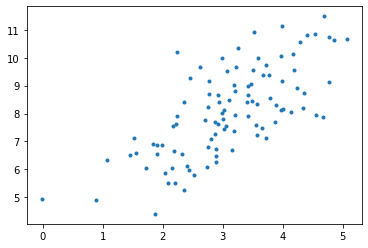

Estimated mu: 
[3.099, 8.077]
Estimated Sigma: 
[[0.910, 1.069], [1.069, 2.501]]
Exact correlation rho:
0.707
Estimated correlation coefficient:
0.708
Fisher Method 95% confidence interval on correlation coefficient: 
[0.594, 0.794]
Bootstrap Method 95% confidence interval on correlation coefficient: 
[0.095, 0.789]
Fraction of time the Fisher interval caught the correlation estimator: 1.0000
Fraction of time the bootstrap interval caught the correlation estimator: 0.9020


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 


def multivariate(sig, mu, n): 
    # computing the square of the variance matrix (sig_sq)
    
    D, V = np.linalg.eig(sig)
    D_sq = np.power(D,0.5)
    sig_sq = V.dot(np.diag(D_sq)).dot(np.linalg.inv(V))
    sig_sq_inv = np.linalg.inv(sig_sq)
    
    k = len(mu)
    result = np.empty(shape=[n,k])
    for i in range(0,n): 
        X = multivariate_2(sig_sq_inv, mu)
        result[i,:] = X
        
    return result

def multivariate_2(sig_sq_inv, mu): 
    # Using property 2 of theorem 14.2 to determine a random vector: 
    Z = np.random.normal(size=2).transpose()
    X = mu + np.linalg.solve(sig_sq_inv, Z)
    return X

sig = ([[1,1],[1,2]])
mu = [3, 8]


# Part for 14.6
nsim = 100
n = nsim

X = multivariate(sig, mu, nsim)

# display the 100 points generated 
plt.figure(1)
plt.plot(X[:,0], X[:,1],'.')
plt.show()

# Mean and variance estimation 
mu_x0 = np.sum(X[:,0])/n
mu_x1 = np.sum(X[:,1])/n 
var_x0 = np.sum(np.power(X[:,0] - mu_x0 ,2)) / (n-1)
var_x1 = np.sum(np.power(X[:,1] - mu_x1 ,2)) / (n-1)
covar_x10 = np.sum( np.multiply( X[:,1]-mu_x1 , X[:,0]-mu_x0 )) / (n-1)
def rho_est(X):
    s2_x0 = np.sum(np.power(X[:,0] - mu_x0 ,2)) / (X.shape[0]-1)
    s2_x1 = np.sum(np.power(X[:,1] - mu_x1 ,2)) / (X.shape[0]-1)
    return 1/(X.shape[0]-1) * np.sum( np.multiply(X[:,0]-mu_x0,X[:,1]-mu_x1)) / np.sqrt(s2_x0*s2_x1)
rho_hat = rho_est(X)
    
print("Estimated mu: ") 
print(f"[{mu_x0:4.3f}, {mu_x1:4.3f}]")
print("Estimated Sigma: ")
print(f"[[{var_x0:4.3f}, {covar_x10:4.3f}], [{covar_x10:4.3f}, {var_x1:4.3f}]]")

print("Exact correlation rho:") 
# recall it's just covariance over square root of both variances 
print(f"{1/np.sqrt(1*2):4.3f}" )
print("Estimated correlation coefficient:")
print(f"{rho_hat:4.3f}" )


# Confidence interval using Fisher method 
def Fisher_interval(X):
    rho_hat = rho_est(X)
    n = X.shape[0]
    theta_hat = 1/2 * (np.log(1+rho_hat) - np.log(1-rho_hat))
    se_hat = 1 / np.sqrt(n-3)
    z = st.norm.ppf(0.975)
    a = theta_hat - z / np.sqrt(n-3)
    b = theta_hat + z / np.sqrt(n-3)
    lb = (np.exp(2*a) - 1) / (np.exp(2*a) + 1)
    rb = (np.exp(2*b) - 1) / (np.exp(2*b) + 1)
    return lb, rb
print("Fisher Method 95% confidence interval on correlation coefficient: ")
lb, rb = Fisher_interval(X)
print(f"[{lb:4.3f}, {rb:4.3f}]")

# Confidence interval using Bootstrap Method 
def Boostrap_interval(X): 
    trial_number = 1000
    sample_size = 10
    rhos = [None]*trial_number
    for i in range(0,trial_number): 
        ids = np.random.randint(0,10, size = sample_size)
        rhos[i] = rho_est(X[ids,:])
    rhos = np.sort(rhos)
    lb = rhos[int(trial_number*0.025)]
    rb = rhos[int(trial_number*0.975)]
    return lb, rb

print("Bootstrap Method 95% confidence interval on correlation coefficient: ")
lb, rb = Boostrap_interval(X)
print(f"[{lb:4.3f}, {rb:4.3f}]")



# Part for 14.6
caught_count_fisher = 0
caught_count_boostrap = 0
count = 1000
for i in range(0,count):
    X = multivariate(sig, mu, nsim)
    rho_hat = rho_est(X)
    
    lb, rb = Fisher_interval(X)
    if lb < rho_hat and rho_hat < rb:
        caught_count_fisher +=1
        
    lb, rb = Boostrap_interval(X)
    if lb < rho_hat and rho_hat < rb:
        caught_count_boostrap +=1
        
print(f"Fraction of the time the Fisher interval caught the correlation estimator: {caught_count_fisher/count:.4f}")
print(f"Fraction of the time the bootstrap interval caught the correlation estimator: {caught_count_boostrap/count:.4f}")

The bootstrap method appears to be inferior. 